In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("../data/evaluation_data_final.csv")

In [8]:
bbc = df[df['data']=="bbc news"]
sarc = df[df['data']=="sarcasm detection"]

In [11]:
bbc.set_index("Model", inplace=True)

In [27]:
bbc

,Runtime,Accuracy,F1,data
Model,,,,
Decision Tree,0.70,0.840449,0.840706,bbc news
Decision Tree fine-tuned,14.45,0.817978,0.822761,bbc news
Random Forest,3.13,0.975281,0.975275,bbc news
LSTM,675.72,0.934831,0.934832,bbc news


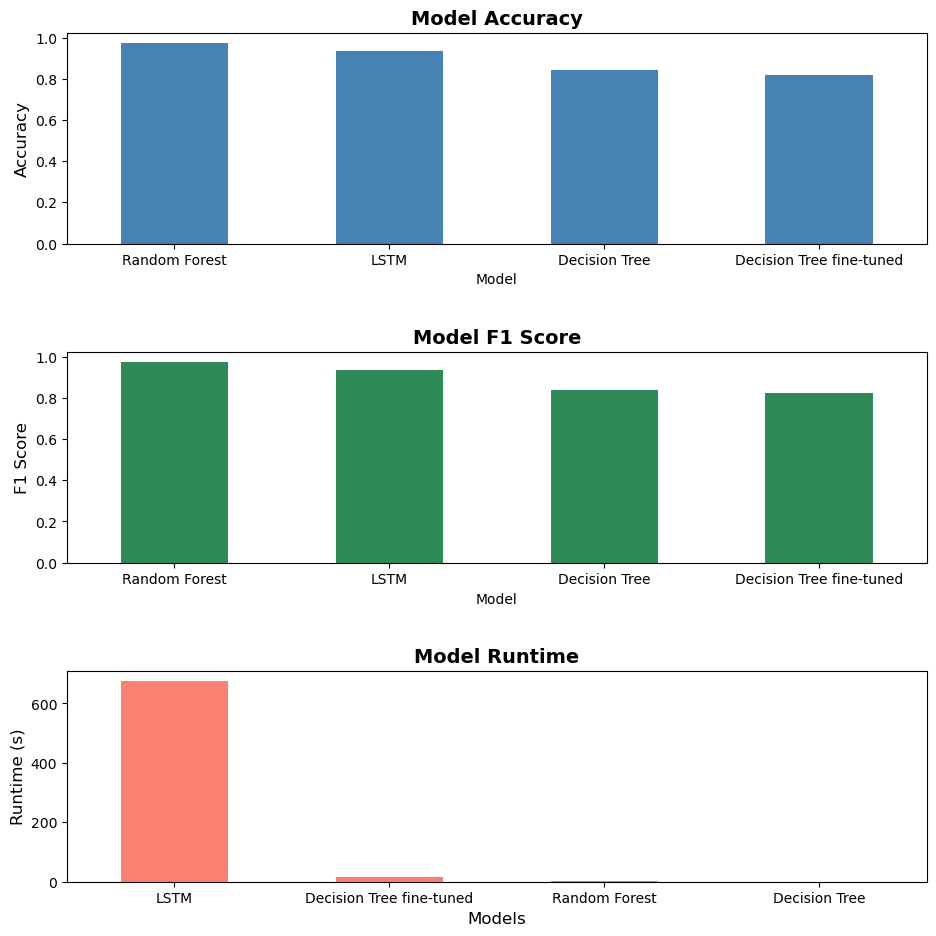

In [23]:
# Assuming 'bbc' is your DataFrame
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))  # Increased figure size for better clarity

# Color palette
colors = ['steelblue', 'seagreen', 'salmon']

# Plotting the data for each subplot
bbc['Accuracy'].sort_values(ascending=False).plot(kind='bar', color=colors[0], rot=0, ax=ax[0])
ax[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=10)

bbc['F1'].sort_values(ascending=False).plot(kind='bar', color=colors[1], rot=0, ax=ax[1])
ax[1].set_title('Model F1 Score', fontsize=14, fontweight='bold')
ax[1].set_ylabel('F1 Score', fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=10)

bbc['Runtime'].sort_values(ascending=False).plot(kind='bar', color=colors[2], rot=0, ax=ax[2])
ax[2].set_title('Model Runtime', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Runtime (s)', fontsize=12)
ax[2].set_xlabel('Models', fontsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=10)

# Improve the layout
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()



In [25]:
sarc.set_index("Model", inplace=True)

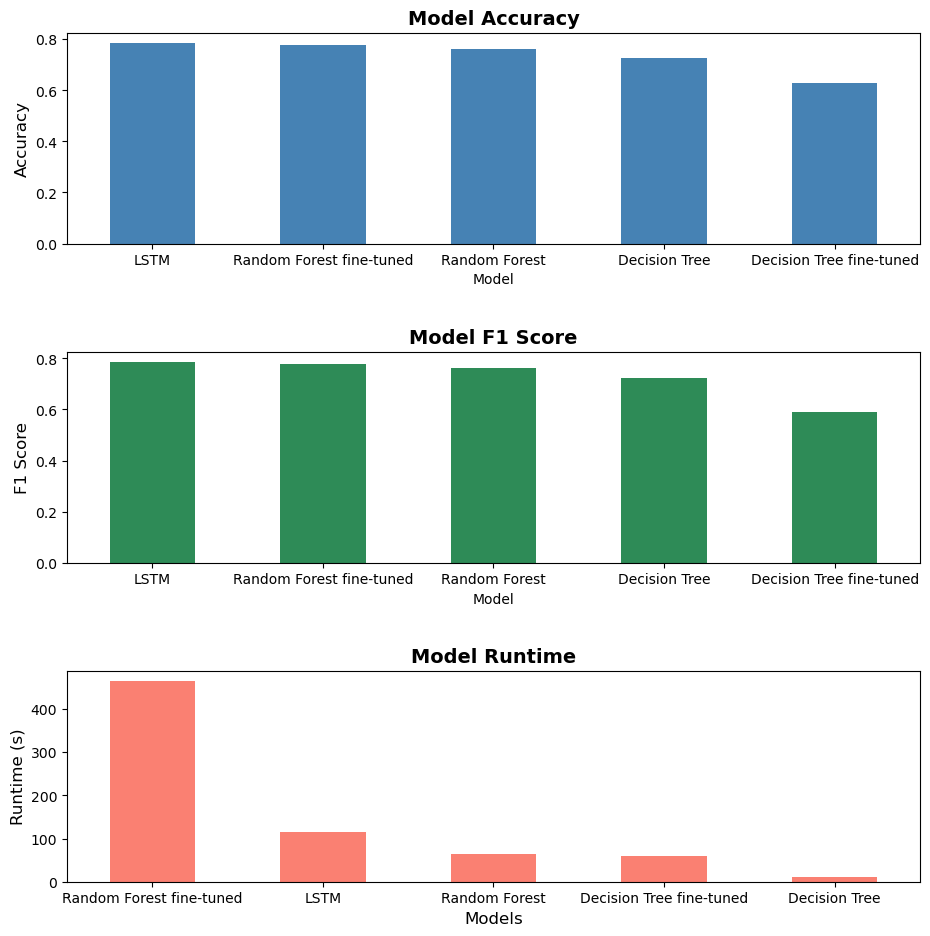

In [26]:
# Assuming 'bbc' is your DataFrame
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))  # Increased figure size for better clarity

# Color palette
colors = ['steelblue', 'seagreen', 'salmon']

# Plotting the data for each subplot
sarc['Accuracy'].sort_values(ascending=False).plot(kind='bar', color=colors[0], rot=0, ax=ax[0])
ax[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=10)

sarc['F1'].sort_values(ascending=False).plot(kind='bar', color=colors[1], rot=0, ax=ax[1])
ax[1].set_title('Model F1 Score', fontsize=14, fontweight='bold')
ax[1].set_ylabel('F1 Score', fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=10)

sarc['Runtime'].sort_values(ascending=False).plot(kind='bar', color=colors[2], rot=0, ax=ax[2])
ax[2].set_title('Model Runtime', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Runtime (s)', fontsize=12)
ax[2].set_xlabel('Models', fontsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=10)

# Improve the layout
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()